# **Modified Gompertz Model 1 for Student Data without treatment**
The student learn and run about the code for the Gompertz model. The model with the treatment is ODE (Ordinary Differential Equation) as follow:
$$  \left\{
\begin{array}{ll}
      \frac{dN}{dt}=N(\alpha-\beta*\ln(N))-\sin(\gamma*t)*N\\
      N(t=0)= N_0.
\end{array}
\right.
$$
where $N_0$ is the initial condition, $\alpha$ is the growth rate, $\beta$ is the dead rate due to internal factors, and $\gamma$ is the death rate due to the external factors.

## References:
1) Kuang, Y, Nagy, J. D, and Eikenberry, S. E (2018), Introduction to Mathematical Oncology, 1st Edition,A Chapman & Hall Book/CRC Press, Boca Raton, FL, USA.

2) Murphy et al, Differences in predictions of ODE models of tumor growth: a cautionary example, BMC Cancer. 2016; 16: 163. Published online 2016 Feb 26. doi: 10.1186/s12885-016-2164-x https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4768423/

3) Renee Brady and Heiko Enderling, Mathematical Models of Cancer: When to Predict Novel Therapies, and When Not to, Bull Math Biol. 2019; 81(10): 3722–3731. Published online 2019 Jul 23. doi: 10.1007/s11538-019-00640-x https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6764933/#CR51


To get the best fit model to the data we optimize the sum of square errors (SSE) between the data and the model, which is the solution of the ODE. We use Nelder-Mead method to solve the optimization problem.

The Optimization Methods is from this website: https://docs.scipy.org/doc/scipy/reference/optimize.html


We use other best fit measuremants, i.e. AIC and BIC, from this website:
https://pypi.org/project/RegscorePy/

To install the package, you need to do as follows: \\
pip install RegscorePy

The usages of AIC and BIC are as follows: \\
aic(y, y_pred, p) \\
bic(y, y_pred, p) \\
where y is the data, y_pred is the model/predicted ouput, and p is the number of parameters (integer).

Before running the code the student need to place the data in their local directory in their own computer. Make sure the name of the data is the same as in the line of the code that call the data. When running the code, the student need to locate the data and click it to open in the code and finish the process finding the solution. The command lines are as follow:

from google.colab import files \\
uploaded = files.upload() \\
for fn in uploaded.keys(): \\
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) \\

We use the data in the Google Drive with the command lines as follows: \\

from google.colab import drive \\
drive.mount('/content/drive')

In [1]:
pip install RegscorePy  # You may not need to run this command line after you did once.

Mounted at /content/drive
Initial SSE Objective: 3.238892399e+13
alpha0: 1.0
beta0  : 1.0
gamma0  : 1.0
Optimization terminated successfully.
         Current function value: 352395828127.906982
         Iterations: 12
         Function evaluations: 839
Final SSE Objective: 3.523958281e+11
alpha : 3.737348356579963
beta  : 0.5425471243390431
gamma  : 1.9678494877868857
 AIC : 477.84577237855615
 SSE : 3.523958281e+11


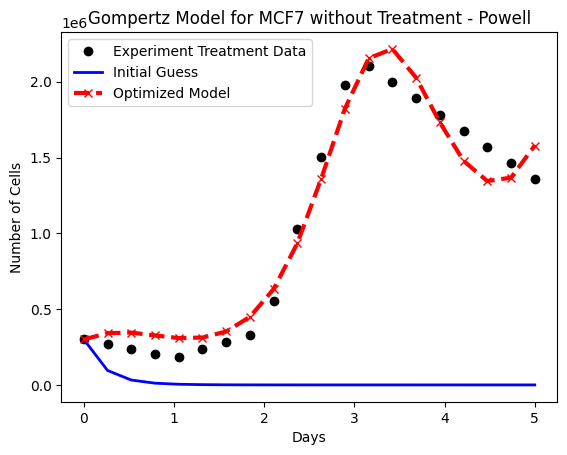

In [2]:
#@title Modified Gompertz Model for MCF7 without Treatment.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize
from RegscorePy import *
from scipy.interpolate import KroghInterpolator

#upload from Google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

# Import txt data file
# Column 1 = time (t)
# Column 2 = output (yp)
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/honourgoldcontrol.txt')
t0 = data[:,0]
# t = np.arange(0,t0.max(),0.125)
t = np.linspace(t0.min(),t0.max(),20)
yp0 = data[:,1]
yp = np.interp(t,t0,yp0)
# create linear interpolation of the yp data versus time
# t=np.linspace(t.min(),t.max(),6)
# print(t)
# yp = np.linspace(yp.min(),yp.max(),6)

# specify number of steps
ns = len(t)
# delta_t = t[1]-t[0]
# ym = yp
# define first-order for the Gombertz model
def fopdt(y,t,x,alpha,beta,gamma):
    # arguments
    #  y      = output
    #  t      = time
    #  x      = input linear function (for time shift)
    #  alpha1 and alpha2  = coeficient for model gain
    #  beta   = model loss or dead/kill
    #
    alpha = x[0]
    beta = x[1]
    gamma = x[2]
    dydt = y*(alpha-beta*np.log10(y))-np.sin(gamma*t)*y
    return dydt

# simulate FOPDT model with x=[Km,taum,thetam]
def sim_model(x,t):
    # input arguments
    alpha = x[0]
    beta = x[1]
    gamma = x[2]

    # storage for model values
    ym = np.zeros(ns)  # model
    # initial condition
    ym[0] = yp[0]

    # loop through time steps
    for i in range(0,ns-1):
        ts = [t[i],t[i+1]]
        y1 = odeint(fopdt,ym[i],ts,args=(x,alpha,beta,gamma))
        ym[i+1] = y1[-1]
    return ym

# define objective.t
def objective(x,t):
    # simulate model
    ym = sim_model(x,t)
    # calculate objective
    obj = 0.0
    for i in range(len(ym)):
        obj = obj + (ym[i]-yp[i])**2
    # return result
    return obj

# initial guesses
x0 = np.zeros(3) # the number of parameters

x0[0] = 1.0      # alpha1 = -1.0, -1.0, -1.0, 1.05, -1.0, -1.55, 1.05,
x0[1] = 1.0       # alpha2 = 0.7, 0.5, 1.0, 0.7, 1.0, 1.08746, 0.716389,
x0[2] = 1.0       # beta = 0.0, 0.0, -0.67, -0.008, -0.68, -0.67,

# AIC : -66.54139985734611, -62.729909274362896, 6.495475728835328, 136.85166008093353, 149.324893034249, 136.90001651479028, 136.86171053805342,
# BIC : -68.4942102951756, -64.6827197121924, 4.54266529100583, 148.28369038038926, 135.85881386093055, 135.8205078841937,
# SSE : 1.123746845e-06, 2.408409607e-06, 2.480680849e+00, 9.119700641e+09, 7.291607615e+10, 9.193496986e+09, 9.134989636e+09,

# show initial objective
print('Initial SSE Objective: ' + "{:.9e}".format((objective(x0,t))))
# print('alpha01: ' + str(x0[0]),', alpha01: ' + str(x0[1]))
print('alpha0: ' + str(x0[0]))
print('beta0  : ' + str(x0[1]))
print('gamma0  : ' + str(x0[2]))
# optimize alpha1, alpha2, beta
# solution = minimize(objective,x0,t,method='Nelder-Mead',
#              options={'xatol': 1e-8, 'maxfev':10000,'disp': True})
solution = minimize(objective,x0,t,method='Powell',
               options={'xtol': 1e-8, 'maxfev':10000,'disp': True})
x = solution.x

# show final objective
print('Final SSE Objective: ' + "{:.9e}".format((objective(x,t))))
print('alpha : ' + str(x[0]))
print('beta  : ' + str(x[1]))
print('gamma  : ' + str(x[2]))
# calculate model with updated parameters
ym1 = sim_model(x0,t)
ym2 = sim_model(x,t)

p = 3  # number of parameters
print(" AIC : " + str(aic.aic(yp, ym2, p)))
# print(" BIC : " + str(bic.bic(yp, ym2, p)))
print(' SSE : ' + "{:.9e}".format((objective(x,t))))

plt.plot(t,yp,'ok',linewidth=2,label='Experiment Treatment Data')
plt.plot(t,ym1,'b',linewidth=2,label='Initial Guess')
plt.plot(t,ym2,'xr--',linewidth=3,label='Optimized Model')

plt.xlabel('Days')
plt.ylabel('Number of Cells')
plt.title('Gompertz Model for MCF7 without Treatment - Powell')
plt.legend(loc='best')
data = np.vstack((t,yp,ym2)) # vertical stack
data = data.T              # transpose data
np.savetxt('/content/drive/MyDrive/Colab Notebooks/SMB 2023/outputGompertzGoldNoTreatmentPowell',data,delimiter=',')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/SMB 2023/outputmodelGompertzGoldNoTreatmentPowell.png',dpi=300, bbox_inches='tight')
plt.show()